<a href="https://colab.research.google.com/github/kaho0/Abstract/blob/main/Finalee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

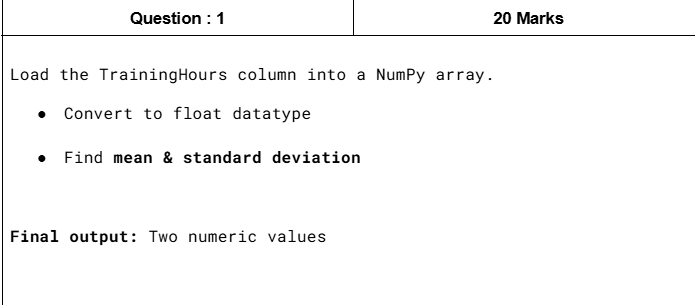

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/final-employee-ds.csv')
df.head(3)


,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3


In [9]:
training_h = np.array(df['TrainingHours'], dtype=float)
print(np.mean(training_h))
print(np.std(training_h))

24.19
13.842467265628624


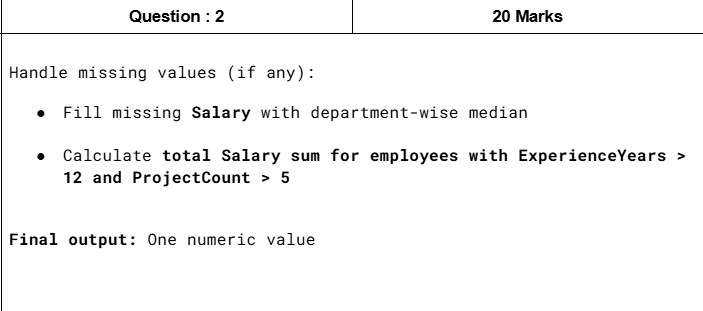

In [24]:
df['Salary'] = df['Salary'].fillna(df.groupby('Department')['Salary'].transform('median'))
total_salary_sum = df[(df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5)]['Salary'].sum()
total_salary_sum

np.float64(1985775.5)

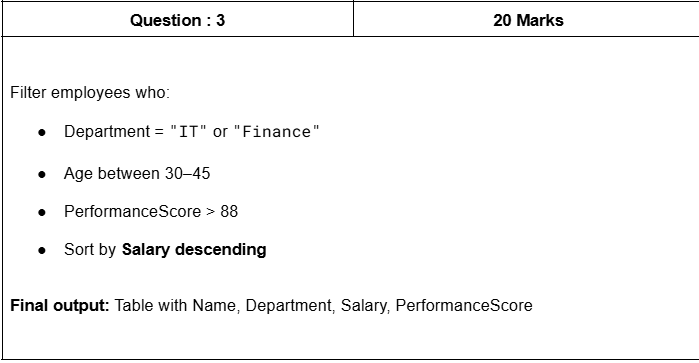

In [27]:
filtered = df[(df['Department'] == 'IT') | (df['Department'] == 'Finance')]
filtered=filtered[(filtered['Age']>=30)&(filtered['Age']<=45)]
filtered=filtered[filtered['PerformanceScore']>88]
sorted=filtered.sort_values(by='Salary',ascending=False)
final=sorted[['Name','Department','Salary','PerformanceScore']]
print(final)

           Name Department    Salary  PerformanceScore
94  Employee_95         IT  140386.0                94
88  Employee_89    Finance  126027.0                92
4    Employee_5    Finance   85543.0                97
32  Employee_33         IT   83919.0                98
55  Employee_56    Finance   49540.0                94


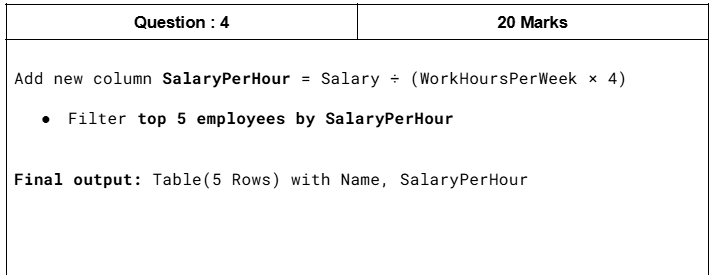

In [29]:
df['SalaryPerHour']=df['Salary']/(df['WorkHoursPerWeek']*4)
top_5_emp=df.sort_values(by='SalaryPerHour',ascending=False).head(5)
top_5_emp

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating,SalaryPerHour
46,147,Employee_47,57,Female,Marketing,1,137379.0,35,97,2018-04-26,L,2,32,1,981.278571
27,128,Employee_28,24,Male,Management,5,135981.0,35,98,2021-05-09,M,9,39,1,971.292857
31,132,Employee_32,30,Male,IT,1,135435.0,35,78,2014-12-29,L,8,5,4,967.392857
79,180,Employee_80,32,Female,IT,5,143691.0,38,85,2020-06-15,L,6,42,5,945.335526
80,181,Employee_81,38,Female,Marketing,7,146306.0,39,67,2021-05-01,S,7,26,5,937.858974


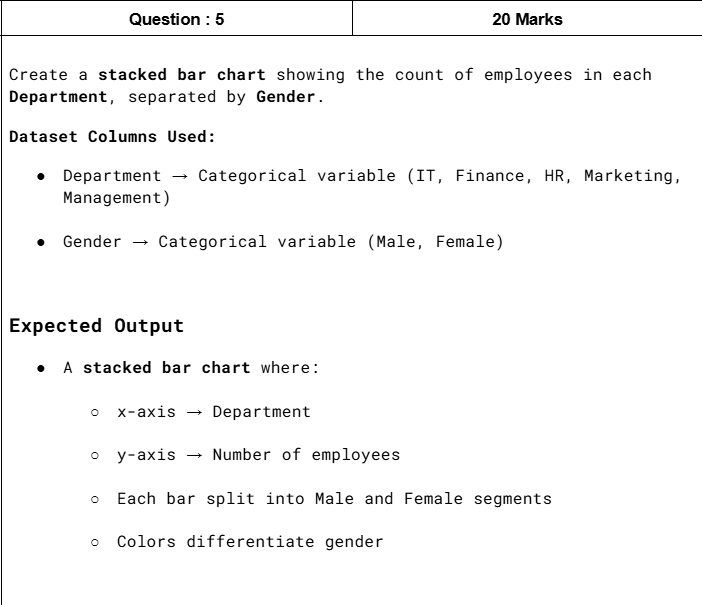